In [1]:
def f(x):
    return 10*x**4 + 3*x**3 - 30*x**2 + 10*x

In [2]:
import matplotlib.pyplot as plt
def plot_f(input):
    plt.title("f(x)")
    plt.xlabel("x")
    plt.ylabel("y")
    y = [f(x) for x in input]
    plt.plot(input, y)
    plt.show()

In [3]:
def gradient_f(x):
    return (40*x**3 + 9*x**2 - 60*x + 10)

In [4]:
from random import uniform

def get_min_f(beta):
    k = 0
    steps = 500
    x = uniform(-3, 3)
    step = 1                                        # needed for while loop
    
    # print("start element: " + str(x))

    while k < steps and step > 0.001:
        gradient = gradient_f(x)
        step = beta * gradient                        # small step in right direction
        x = x - step
        k += 1
    # print(k)
    return x                                            # min value should be here

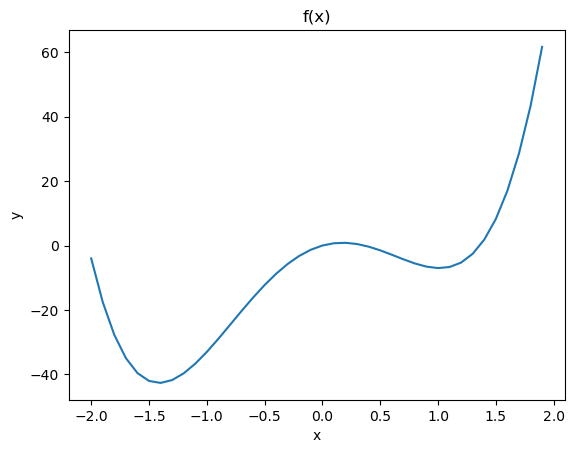

x: -1.5588960202629998
y: -40.802128741433826
-------------------
x: 0.2705885576458347
y: 0.6223855461908929
-------------------
x: -1.344160349219531
y: -42.28629716094394
-------------------
x: -2.8633749283816465
y: 327.1912924768211
-------------------
x: 1.1161615520871697
y: -6.520694719129219
-------------------
x: -1.3440978752068193
y: -42.28568670975665
-------------------
x: 0.37768486744691687
y: -0.1374231401472077
-------------------
x: -1.3438314472966202
y: -42.28307755875952
-------------------
x: 1.115458798785159
y: -6.527599605514796
-------------------
x: -2.65097496207047
y: 200.6508954336297
-------------------


In [5]:
import numpy as np

input = np.arange(-2.0, 2.0, 0.1)
plot_f(input)

beta = 0.5
for i in range(10):
    result = get_min_f(beta)
    print("x: " + str(result))
    print("y: " + str(f(result)))
    print("-------------------")

In [6]:
def g(x1, x2):
    return 10*(x2**4)+10*(x1**4)+3*(x1**3)-30*(x1**2)+10*x1

In [7]:
from mpl_toolkits.mplot3d import Axes3D
def plot_g(a, b):
    X1, X2 = np.meshgrid(a, b)
    y = g(X1, X2)

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(X2, X1, y)
    plt.title("g(x1, x2)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

In [8]:
def gradient_g(x1, x2):
    return (40*x1**3 + 9*x1**2 - 60*x1 + 10, 40*x2**3)

In [9]:
def get_min_g(beta):
    k = 0
    steps = 500
    x1, x2 = uniform(-2, 2), uniform(-2, 2)
    step = 1

    print("start elements: " + str(x1) + ", " + str(x2))
    
    while k < steps and step > 0.001:
        gradient = gradient_g(x1, x2)
        step1, step2 = beta * gradient[0], 0.0001 * gradient[1]
        x1 = x1 - step1
        x2 = x2 - step2
        k += 1
    return x1, x2                                                       # min value should be here

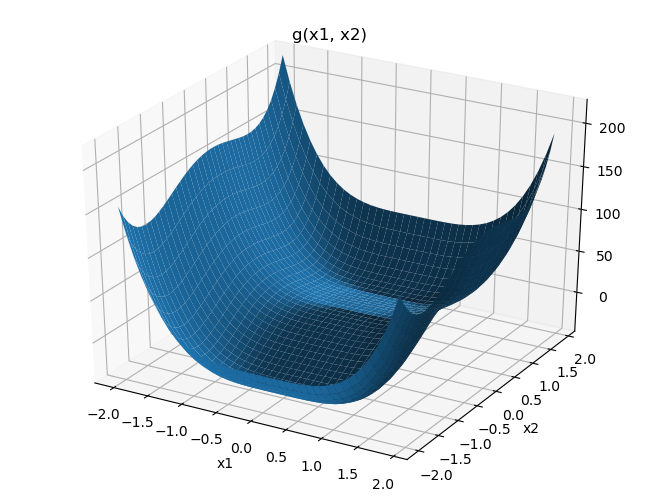

start elements: -0.2827543047126868, 1.3161481046256576
x1: -1.4068312196052084
x2: 0.4667724714250125
y: -42.150623991327755
-------------------
start elements: -1.4661655674425327, -0.9744958416964882
x1: -1.412392366482777
x2: -0.4444460045793884
y: -42.23748884075751
-------------------
start elements: -0.7707542057425485, 1.2283494810173696
x1: -1.4116755181092642
x2: 0.462521697642472
y: -42.16999689797606
-------------------
start elements: 1.9165235925684945, 0.6780931275409974
x1: 1.018474117117865
x2: 0.40222374321208326
y: -6.7431509753069
-------------------
start elements: 1.1427533841615363, 1.3493263221297864
x1: 1.014376631011696
x2: 0.46819132190404444
y: -6.525687565883228
-------------------
start elements: -1.0853538769278388, 0.8707658585448312
x1: -1.4121622161312586
x2: 0.43326013538576646
y: -42.27530868353243
-------------------
start elements: -1.6400529976398817, -1.7147853324227076
x1: -1.4124486259626792
x2: -0.47916408390939746
y: -42.10052488739415
------

In [10]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = np.arange(-2.0, 2.0, 0.1)
plot_g(x1, x2)

beta = 0.0001

for i in range(10):    
    result = get_min_g(beta)
    print("x1: " + str(result[0]))
    print("x2: " + str(result[1]))
    print("y: " + str(g(result[0], result[1])))
    print("-------------------")

In [11]:
def get_beta():
    beta = [round(0.3*i, 3) for i in range(1, 21)]
     
    # x1, x2 = [], []
    # f_y = []
    # g_y = []

    # for i in range(0, n):
    #     x1.append(uniform(-2, 2))
    #     x2.append(uniform(-2, 2))

    # for a, b in x1:
    #     f_y.append(f(a))
    #     g_y.append(g(a, b))

    return beta


In [12]:
def get_data(n=500):
    beta = get_beta()

    for b in beta:
        result = []
        for x in range(n):
            try:
                result.append(get_min_f(b))
            except:
                result.append(None)
    
    return result

In [13]:
# def error_count_test():
#     data = get_data()
#     none_counter = 0
#     for _ in data:
#         if _ == None:
#             none_counter+=1
#     return none_counter



def test_f(n=500):
    beta = get_beta()
    
    result = [[] for i in range(len(beta))]
    
    for i in range(len(beta)):
        for j in range(n):
            result[i].append(get_min_f(beta[i]))
            
    return (beta, result)

ValueError: x and y must be the same size

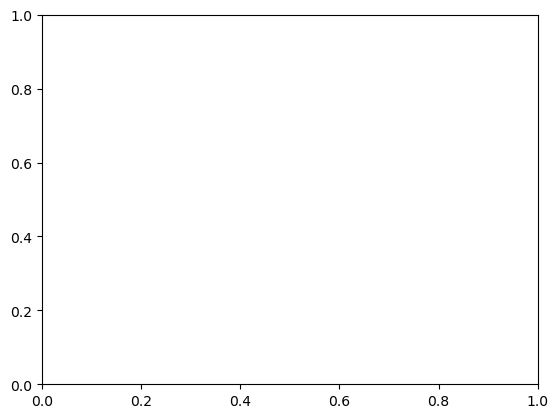

In [14]:
# print(error_count_test())
# print(test_f())

def point_plot(data):
    plt.scatter(data[0], data[1], alpha=0.01)
    plt.xticks(rotation=90)
    plt.xlabel("beta")
    plt.ylabel("value")
    plt.show()

data = test_f()
point_plot(data)